# Project Introduction

Digital Education in India is increasing day by day with advancement of web-based learning services, specifically, eLearning platforms. Rise of new digital technology also brings new chalanges. Digital classrooms are conducted via video telephony software program (ex-Zoom) where it’s not possible to see all students and access the mood. Students are not focusing on content due to lack of surveillance, but this challenge can be overcome by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing the face, mark the attendance, log the individual’s
session time and put a drowsiness alert.


## Face Recognition

Face recognition algorithms can extract features from a face image namely positions of forehead, eyes, nose, mouth, chin, jaws. 

Face Landmarks – There are 68 specific points (called landmarks) that exist on every face. 



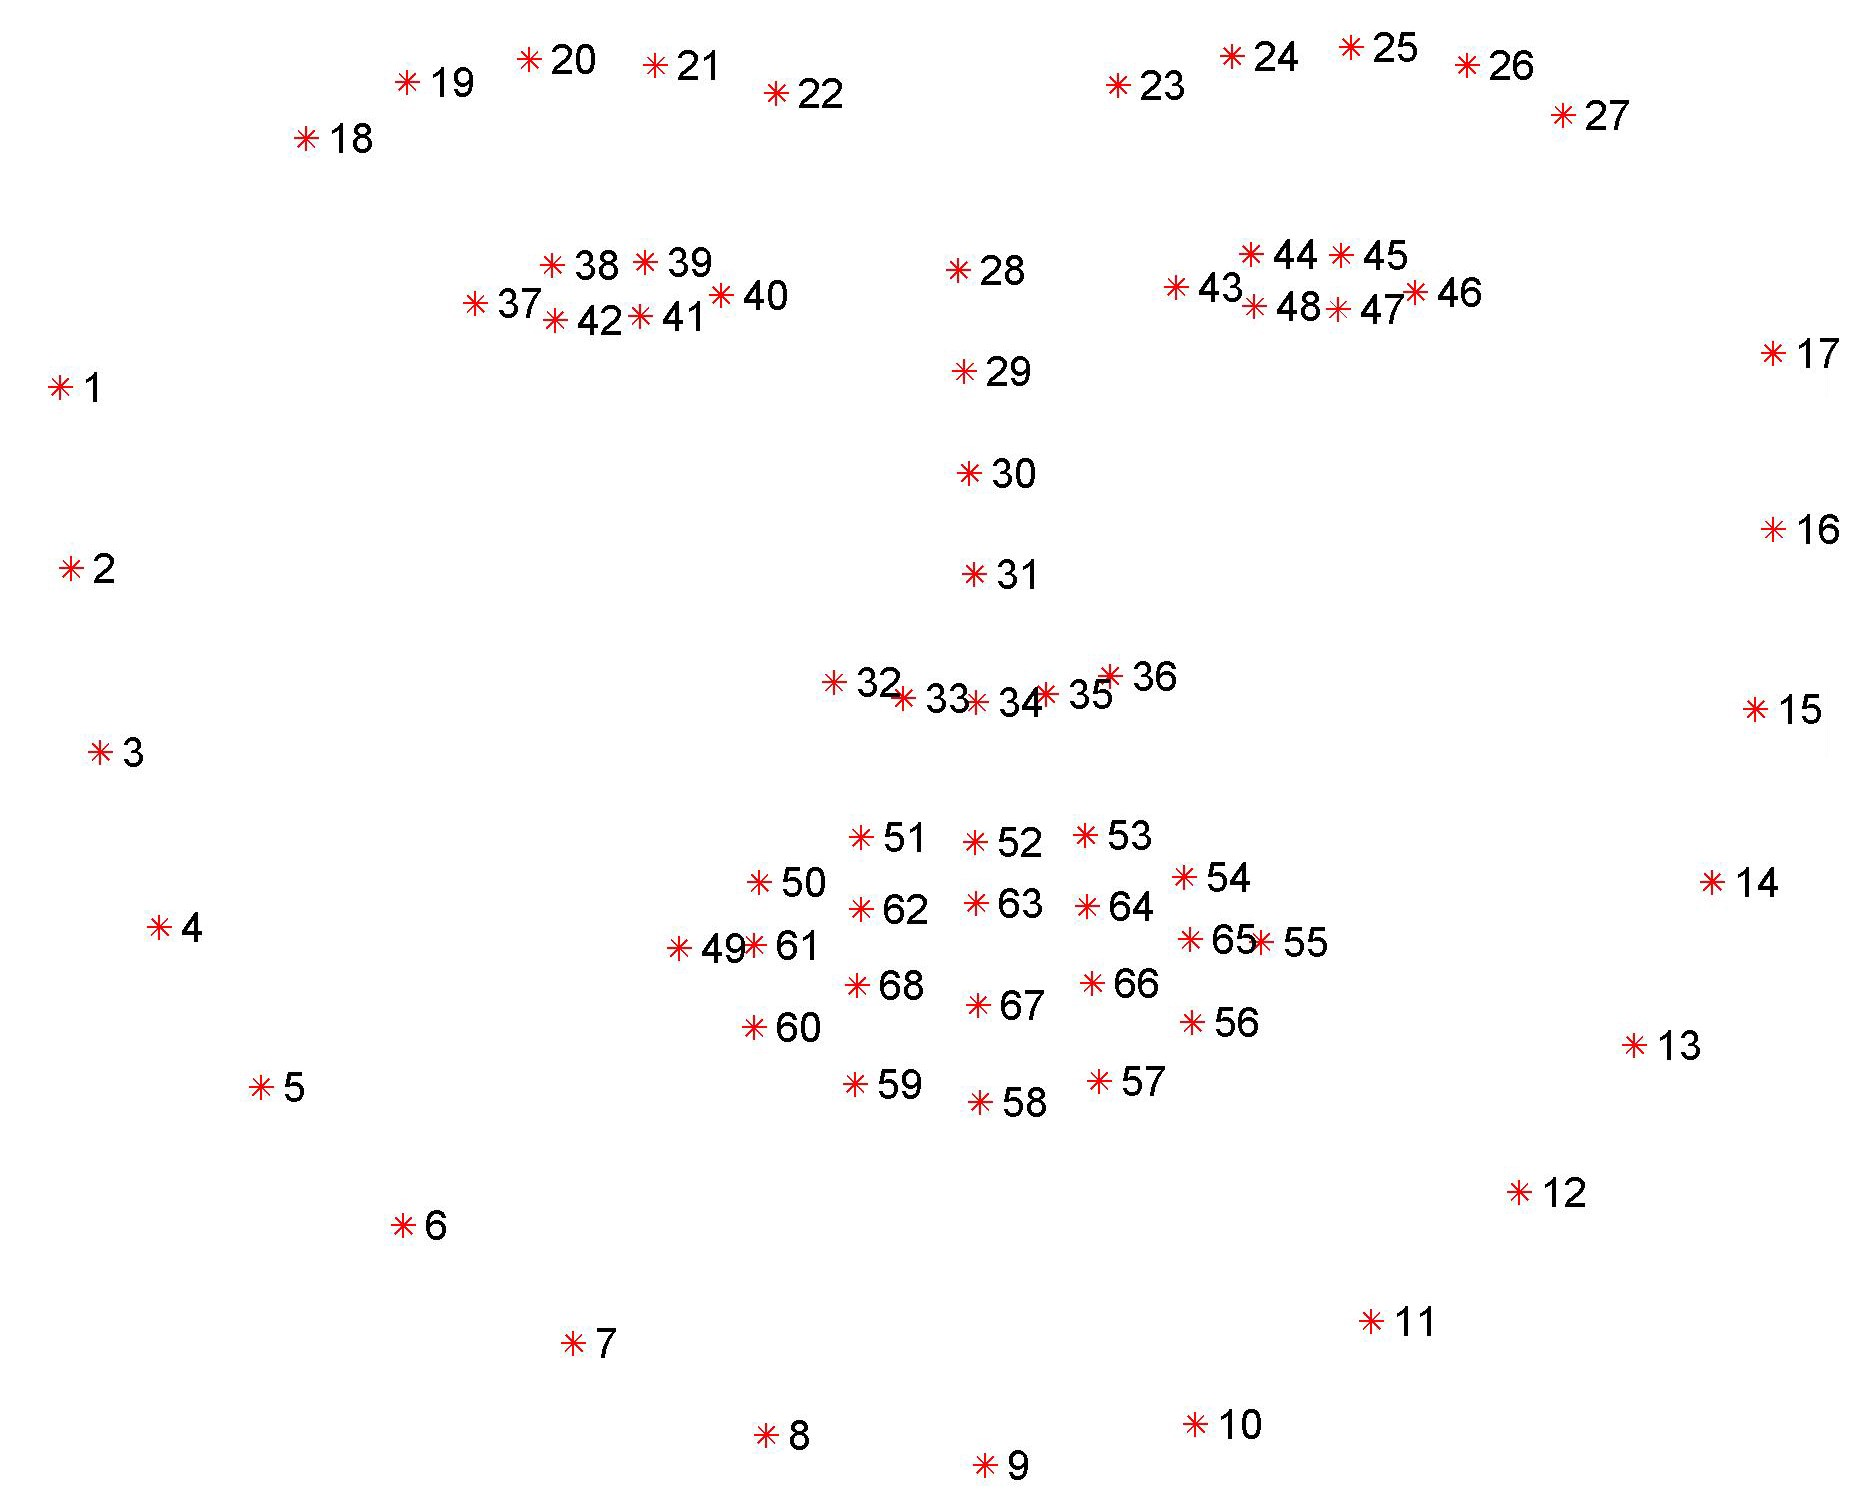

We will use [Face Recognition Library](https://github.com/ageitgey/face_recognition) to detect face.

In [1]:
# import libraries
import face_recognition as fr
import PIL
import cv2

In [32]:
# load an image file (.jpg, .png, etc) into a numpy array

imgprad = fr.load_image_file('../images/pradip.jpeg')
imgAng = fr.load_image_file('../images/andrew_ng.jpg')

Test = fr.load_image_file('../images/test.jpg')


In [33]:
# given an image, return the 128-dimension face encoding for each face in the image.
encodeAng = fr.face_encodings(imgAng)[0]  # extract first encoding from the list
encodeprad = fr.face_encodings(imgprad)[0]  # extract first encoding from the list
encTest = fr.face_encodings(Test)[0]


In [35]:
# compare a list of face encodings against a test encoding to see if they match
# euclidean distance for each face encoding is calculated and compared with tolerance value
# tolerance is the distance between faces to consider it a match
result = fr.compare_faces([encodeAng, encodeprad],encTest,tolerance=0.6)
print((result))

[False, True]


In [36]:
fLoc = fr.face_locations(imgAng)[0]
fLocTest = fr.face_locations(Test)[0]
faceDist = fr.face_distance([encodeAng],encTest)
print(fLoc,fLocTest)

(56, 165, 146, 76) (98, 201, 253, 46)


In [46]:
Test.shape

(337, 260, 3)

In [69]:
PIL.Image.fromarray(Test[130:138,147:,:])

In [73]:
PIL.Image.fromarray(imgAng[55:63,84:117,:])

In [65]:
fr.face_landmarks(imgAng)

[{'chin': [(63, 81),
   (63, 95),
   (63, 109),
   (66, 122),
   (71, 135),
   (80, 145),
   (91, 153),
   (102, 159),
   (113, 162),
   (123, 160),
   (131, 153),
   (138, 144),
   (144, 135),
   (148, 124),
   (151, 113),
   (153, 101),
   (153, 91)],
  'left_eyebrow': [(84, 63), (91, 57), (100, 55), (109, 56), (117, 61)],
  'right_eyebrow': [(130, 64), (137, 63), (144, 64), (149, 69), (151, 76)],
  'nose_bridge': [(123, 76), (124, 84), (124, 92), (125, 101)],
  'nose_tip': [(111, 107), (115, 108), (120, 110), (125, 110), (129, 110)],
  'left_eye': [(94, 73), (99, 70), (105, 71), (109, 77), (104, 77), (98, 75)],
  'right_eye': [(130, 81),
   (135, 78),
   (141, 79),
   (144, 84),
   (140, 85),
   (135, 83)],
  'top_lip': [(98, 123),
   (106, 118),
   (114, 116),
   (118, 118),
   (123, 118),
   (128, 121),
   (130, 128),
   (127, 128),
   (122, 123),
   (118, 122),
   (113, 121),
   (100, 123)],
  'bottom_lip': [(130, 128),
   (126, 135),
   (121, 137),
   (116, 137),
   (111, 136),


In [21]:
camera = cv2.VideoCapture(0)

In [23]:
camera.release()

In [13]:
PIL.Image.fromarray(camera.read()[1])

AttributeError: 'NoneType' object has no attribute '__array_interface__'

In [ ]:
def gen_frames():  
    while True:
        success, frame = camera.read()  # read the camera frame
        if not success:
            break
        else:
            ret, buffer = cv2.imencode('.jpg', frame)
            frame = buffer.tobytes()
            yield (b'--frame\r\n'
                   b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')  # concat frame one by one and show result

In [15]:
import streamlit as st

In [16]:
st.write('hello world!')

2021-05-04 23:48:26.168 WARNING root: 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [18]:
out = cv2.VideoWriter('output.mp4', -1, 20.0, (640,480))

In [22]:
while(camera.isOpened()):
    ret, frame = camera.read()
    if ret==True:
        frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break